# Weather Tweet TextClassification : Predicting Confidence Scores with Artificial Neural Network

# Aim of Project

The aim of this project is to develop a machine learning model that can predict the confidence score for each of the 24 labels 
(related to sentiment, when, and kind) in a weather_tweets, given the text of the tweet and its location. The model will be trained on a labeled dataset of tweets, where each tweet is labeled with its corresponding confidence score for each label. The performance 
of the model will be evaluated using various classification metrics, and the insights gained from the analysis of the dataset 
will be used to improve the model's accuracy and performance.




# Dataset Description

The training set contains tweets, locations, and a confidence score for each of 24 possible labels.  The 24 labels come from 
three categories: sentiment, when, and kind. Human raters can choose only one label from the "sentiment" and "when" categories, 
but are allowed multiple choices for the "kind". 

s1,"I can't tell"
s2,"Negative"
s3,"Neutral / author is just sharing information"
s4,"Positive"
s5,"Tweet not related to weather condition"

w1,"current (same day) weather"
w2,"future (forecast)"
w3,"I can't tell"
w4,"past weather"

k1,"clouds"
k2,"cold"
k3,"dry"
k4,"hot"
k5,"humid"
k6,"hurricane"
k7,"I can't tell"
k8,"ice"
k9,"other"
k10,"rain"
k11,"snow"
k12,"storms"
k13,"sun"
k14,"tornado"
k15,"wind"

For example, 
a tweet "The hot and humid weather yesterday was awesome!" could have s4=1, w4=1, k4=1, k5=1, with the rest marked as zero



In [1]:
# Importing neccessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset

df=pd.read_csv('E:\\Downloads\\weather_tweets\\train.csv')

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77946 entries, 0 to 77945
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        77946 non-null  int64  
 1   tweet     77946 non-null  object 
 2   state     77946 non-null  object 
 3   location  66994 non-null  object 
 4   s1        77946 non-null  float64
 5   s2        77946 non-null  float64
 6   s3        77946 non-null  float64
 7   s4        77946 non-null  float64
 8   s5        77946 non-null  float64
 9   w1        77946 non-null  float64
 10  w2        77946 non-null  float64
 11  w3        77946 non-null  float64
 12  w4        77946 non-null  float64
 13  k1        77946 non-null  float64
 14  k2        77946 non-null  float64
 15  k3        77946 non-null  float64
 16  k4        77946 non-null  float64
 17  k5        77946 non-null  float64
 18  k6        77946 non-null  float64
 19  k7        77946 non-null  float64
 20  k8        77946 non-null  fl

In [4]:
# columns in dataset
df.columns

Index(['id', 'tweet', 'state', 'location', 's1', 's2', 's3', 's4', 's5', 'w1',
       'w2', 'w3', 'w4', 'k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9',
       'k10', 'k11', 'k12', 'k13', 'k14', 'k15'],
      dtype='object')

In [5]:
df

,id,tweet,state,location,s1,s2,s3,s4,s5,w1,...,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},oklahoma,Oklahoma,0.0,0.000,1.000,0.000,0.000,0.800,...,0.0,0.000,0.0,0.000,1.000,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,florida,Miami-Ft. Lauderdale,0.0,0.000,0.000,1.000,0.000,0.196,...,0.0,0.000,0.0,0.000,1.000,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,idaho,NaN,0.0,0.000,0.000,0.000,1.000,0.000,...,0.0,1.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,minnesota,Minneapolis-St. Paul,0.0,0.000,0.000,1.000,0.000,1.000,...,0.0,0.604,0.0,0.196,0.000,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,rhode island,Purgatory,0.0,0.000,0.000,0.403,0.597,1.000,...,0.0,0.000,0.0,0.000,0.000,0.0,0.0,1.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77941,120095,"Current Conditions: Fair, 78 FForecast: Sat - ...",florida,"Jacksonville, Florida",0.0,0.000,1.000,0.000,0.000,0.206,...,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.794,0.0,0.0
77942,120097,WE DOIN SOMETHING DIFFERENT... SINCE THE WEATH...,colorado,"Denver,Colorado",0.0,0.000,0.000,1.000,0.000,1.000,...,0.0,1.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0
77943,120098,OMG #WeatherForecast for tomm 80 degrees & Sun...,pennsylvania,"Philadelphia, United States",0.0,0.000,0.000,1.000,0.000,0.000,...,0.0,0.000,0.0,0.000,0.000,0.0,0.0,1.000,0.0,0.0
77944,120100,@mention Oh no! We had cold weather early in t...,alabama,Birmingham (Ann and Tusc),0.0,0.385,0.410,0.205,0.000,0.416,...,0.0,0.000,0.0,0.211,0.591,0.0,0.0,0.000,0.0,0.0


In [8]:
# Identify the Labels
sentiment_labels = df.columns[4:9]
when_labels = df.columns[9:13]
kind_labels = df.columns[13:]

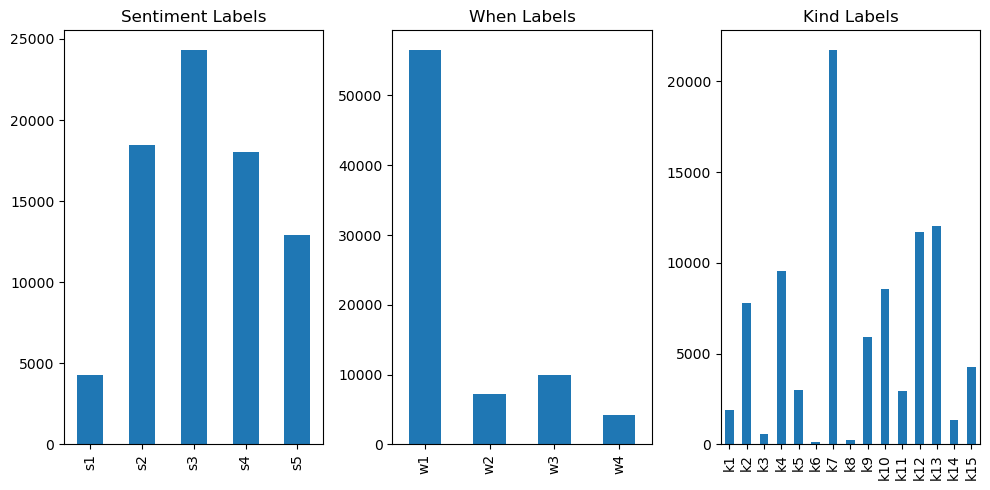

In [9]:
# Plot the Label Distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
df[sentiment_labels].sum().plot(kind='bar')
plt.title('Sentiment Labels')

plt.subplot(1, 3, 2)
df[when_labels].sum().plot(kind='bar')
plt.title('When Labels')

plt.subplot(1, 3, 3)
df[kind_labels].sum().plot(kind='bar')
plt.title('Kind Labels')

plt.tight_layout()
plt.show()

from plot we can see The imbalanced distribution of confidence scores across different labels in the dataset.This is due to the fact that the quantity of data points available for each label varies.
in sentiment labels sum of confidence score for s3('Neutral') is highest follwed by s2('Negative') and s4('Positive') and low for s5("Tweet not related to weather condition") follwed by s1("I can't tell").so dataset is imbalanced.

In [10]:
# count of different states in state 
df['state'].groupby(df['state']).count()

state
alabama                 1577
alaska                   714
arizona                 1575
arkansas                 808
california              3765
colorado                1712
connecticut             1548
delaware                 749
district of columbia     782
florida                 3659
georgia                 1519
hawaii                   765
idaho                    752
illinois                1760
indiana                 1671
iowa                     880
kansas                  1688
kentucky                1612
louisiana                837
maine                    772
maryland                1574
massachusetts           1673
michigan                2487
minnesota               1691
mississippi              773
missouri                1599
montana                  771
nebraska                 887
nevada                  1511
new hampshire            769
new jersey               857
new mexico              1478
new york                1647
north carolina          3169
north da

In [11]:
# count of different location in location
df['location'].groupby(df['location']).count()

location
 4, MS                            1
 72401                            1
 Alabama                          1
 Annapolis,MD                     1
 Baltimore                        3
                                 ..
ÜT                                1
ιnsιdε uя вlunτ& вαявιεs'я'us     1
нσℓℓуωσσ∂ [Jacksonville, Fl)      1
✿ Nєω Yσяк Cιту✿                  1
집                                 1
Name: location, Length: 12155, dtype: int64

lets drop columns['id','state','location']

In [12]:
df.drop(columns=['id','state','location'],axis=1,inplace=True)

In [13]:
df

,tweet,s1,s2,s3,s4,s5,w1,w2,w3,w4,...,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,Jazz for a Rainy Afternoon: {link},0.0,0.000,1.000,0.000,0.000,0.800,0.000,0.200,0.000,...,0.0,0.000,0.0,0.000,1.000,0.0,0.0,0.000,0.0,0.0
1,RT: @mention: I love rainy days.,0.0,0.000,0.000,1.000,0.000,0.196,0.000,0.804,0.000,...,0.0,0.000,0.0,0.000,1.000,0.0,0.0,0.000,0.0,0.0
2,Good Morning Chicago! Time to kick the Windy C...,0.0,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,...,0.0,1.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0
3,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,...,0.0,0.604,0.0,0.196,0.000,0.0,0.0,0.201,0.0,0.0
4,@mention good morning sunshine,0.0,0.000,0.000,0.403,0.597,1.000,0.000,0.000,0.000,...,0.0,0.000,0.0,0.000,0.000,0.0,0.0,1.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77941,"Current Conditions: Fair, 78 FForecast: Sat - ...",0.0,0.000,1.000,0.000,0.000,0.206,0.794,0.000,0.000,...,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.794,0.0,0.0
77942,WE DOIN SOMETHING DIFFERENT... SINCE THE WEATH...,0.0,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,...,0.0,1.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0
77943,OMG #WeatherForecast for tomm 80 degrees & Sun...,0.0,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,...,0.0,0.000,0.0,0.000,0.000,0.0,0.0,1.000,0.0,0.0
77944,@mention Oh no! We had cold weather early in t...,0.0,0.385,0.410,0.205,0.000,0.416,0.385,0.000,0.199,...,0.0,0.000,0.0,0.211,0.591,0.0,0.0,0.000,0.0,0.0


# Train and Test splitting

In [14]:
def _load_and_shuffle_data(data,
                           seed,
                           ):
    """Loads and shuffles the dataset using pandas.
    # Arguments
        data: dataframe.
        seed: int, seed for randomizer. 
    """
    np.random.seed(seed)
    data=data
    return data.reindex(np.random.permutation(data.index))


def _split_training_and_validation_sets(texts,labels_s,labels_w,labels_k, validation_split):
    """Splits the texts and labels into training and validation sets.
    # Arguments
        texts: dataframe, text data.
        labels: dataframe, label data.
        validation_split: float, percentage of data to use for validation.
    # Returns
        A dataframe of training and validation data.
    """
    num_training_samples = int((1 - validation_split) * (texts.shape[0]))
    return ((texts.iloc[:num_training_samples],labels_s.iloc[:num_training_samples],labels_w.iloc[:num_training_samples],labels_k.iloc[:num_training_samples]),
            (texts.iloc[num_training_samples:],labels_s.iloc[num_training_samples:], labels_w.iloc[num_training_samples:], labels_k.iloc[num_training_samples:]))
    
def load_tweet_weather_topic_classification_dataset(data,
                                                    validation_split=0.2,
                                                    seed=123):
   '''gives train and test datasets for each label(sentiment,when,kind)
    # Arguments
        data: dataframe. 
        validation_split: float, percentage of data to use for validation.
        seed: int, seed for randomizer.
   
   '''
    
    data = _load_and_shuffle_data(data,seed)

    # Get tweet text and the labels seperated
    texts = data['tweet']
    
    # labels for 'sentiment'
    labels_s=data.loc[:,'s1':'s5']
    
    # labels for 'when'
    labels_w=data.loc[:,'w1':'w4']
    
    # labels for 'kind'
    labels_k=data.loc[:,'k1':'k15']

    return _split_training_and_validation_sets(
        texts, labels_s,labels_w,labels_k ,validation_split)

In [15]:
(train_data,train_labels_s,train_labels_w,train_labels_k),(test_data,test_labels_s,test_labels_w,test_labels_k)=load_tweet_weather_topic_classification_dataset(df,
                                                    validation_split=0.2,
                                                    seed=123)

In [16]:
type(train_data)

pandas.core.series.Series

In [17]:
train_data.shape

(62356,)

In [18]:
train_labels_s.shape

(62356, 5)

In [19]:
train_labels_w.shape

(62356, 4)

In [20]:
train_labels_k.shape

(62356, 15)

In [21]:
test_data.shape

(15590,)

In [22]:
test_labels_s.shape

(15590, 5)

In [23]:
train_labels_s

,s1,s2,s3,s4,s5
23191,0.0,0.000,1.000,0.000,0.000
31776,0.0,0.000,0.000,1.000,0.000
12920,0.0,0.183,0.000,0.000,0.817
13478,0.0,0.000,0.207,0.000,0.793
8823,0.0,0.000,1.000,0.000,0.000
...,...,...,...,...,...
49062,0.0,1.000,0.000,0.000,0.000
71629,0.0,0.200,0.597,0.204,0.000
5457,0.0,0.000,1.000,0.000,0.000
62777,0.0,0.000,0.000,1.000,0.000


# Tokenization and Vectorization

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [25]:
#i am mouse - i, am, mouse, i am, am mouse

vectorizer = TfidfVectorizer(dtype='float32',
                             max_features=2000,
                             ngram_range=(1,3),
                             strip_accents='unicode',
                             decode_error='replace', 
                             analyzer='word',
                             min_df=2)

In [26]:
x_train = vectorizer.fit_transform(train_data)

C:\Users\Ashit\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:2029: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. float32 'dtype' will be converted to np.float64.
  warnings.warn(


In [27]:
x_test = vectorizer.transform(test_data)

In [31]:
x_train =x_train.toarray()


In [32]:
x_test =x_test.toarray()

In [33]:
x_train.shape

(62356, 2000)

In [34]:
x_test.shape

(15590, 2000)

In [37]:
# Converting y from dataframe to numpy array
y_train_s=np.array(train_labels_s)
y_train_w=np.array(train_labels_w)
y_train_k=np.array(train_labels_k)

In [38]:
y_test_s=np.array(test_labels_s)
y_test_w=np.array(test_labels_w)
y_test_k=np.array(test_labels_k)

In [39]:
y_train_s.shape


(62356, 5)

In [40]:
y_train_w.shape


(62356, 4)

In [41]:
y_train_k.shape

(62356, 15)

# ANN(Artificial Neural Network) Model

## sentiment_ANN

In [42]:
#Import libraries or packages in python

#After keras and tensorflow are installed in system and restarted.

from keras.models import Sequential

#Flatten - 2d (width, height)
from keras.layers import Dense, Flatten, Dropout



# Model creation - first attempt

#Note: each text has 2000 features

sentiment_ANN = Sequential()




In [43]:
sentiment_ANN.add(Flatten())
# adding layers and units to ANN model
sentiment_ANN.add(Dense(units=512, activation='relu'))
#Add dropout regularization - a percentage of units should be set to 0. Eg: 0.25 - so 25% of units will
#be set to 0
sentiment_ANN.add(Dropout(rate=0.35))
# hidden layer
sentiment_ANN.add(Dense(units=256, activation='relu'))
sentiment_ANN.add(Dropout(rate=0.35))
#output layer
sentiment_ANN.add(Dense(units=5, activation='softmax'))





In [44]:
# compilation
sentiment_ANN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#Save the best model (W, b) by comparing accuracy/loss on validation set
filename = 'bestmodel_sentiment_trial1.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')

#if monitored value doesnt improve for #patience epochs, then stop training
es = EarlyStopping(monitor='val_loss', patience=10)

#if monitored value doesnt improve for #patience epochs, LR(new) = LR(old)*factor
rd = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)





In [46]:
#Training model with x_train
history =sentiment_ANN.fit(x_train, y_train_s, epochs=5, validation_split=0.2, callbacks=[checkpoint, es, rd])


Epoch 1/5
1558/1559 [============================>.] - ETA: 0s - loss: 1.0652 - accuracy: 0.6388
Epoch 1: val_accuracy improved from -inf to 0.67134, saving model to bestmodel_sentiment_trial1.h5
1559/1559 [==============================] - 81s 48ms/step - loss: 1.0651 - accuracy: 0.6388 - val_loss: 1.0020 - val_accuracy: 0.6713 - lr: 0.0010
Epoch 2/5
1558/1559 [============================>.] - ETA: 0s - loss: 0.9740 - accuracy: 0.6963
Epoch 2: val_accuracy improved from 0.67134 to 0.67383, saving model to bestmodel_sentiment_trial1.h5
1559/1559 [==============================] - 75s 48ms/step - loss: 0.9739 - accuracy: 0.6964 - val_loss: 0.9999 - val_accuracy: 0.6738 - lr: 0.0010
Epoch 3/5
1558/1559 [============================>.] - ETA: 0s - loss: 0.9190 - accuracy: 0.7313
Epoch 3: val_accuracy improved from 0.67383 to 0.67832, saving model to bestmodel_sentiment_trial1.h5
1559/1559 [==============================] - 76s 49ms/step - loss: 0.9191 - accuracy: 0.7313 - val_loss: 0.997

In [47]:
# sentiment_ANN Architecture
sentiment_ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2000)              0         
                                                                 
 dense (Dense)               (None, 512)               1024512   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 1,157,125
Trainable params: 1,157,125
Non-

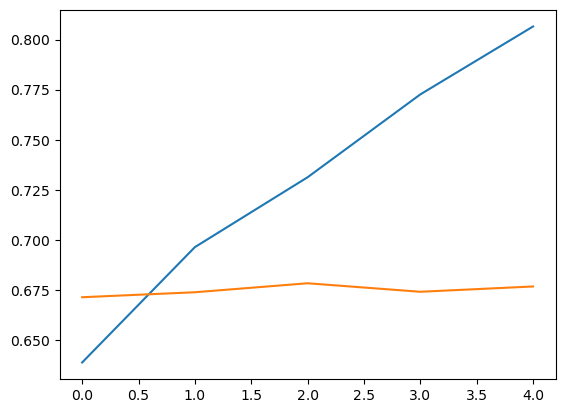

In [48]:
#plot accuracy with epochs 

#training accuracy
plt.plot(history.history['accuracy'])
#validation accuracy
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
# add legends
plt.legend(['train','validation'])
# title of plot
plt.title('acuuracy with eopch')
plt.show()


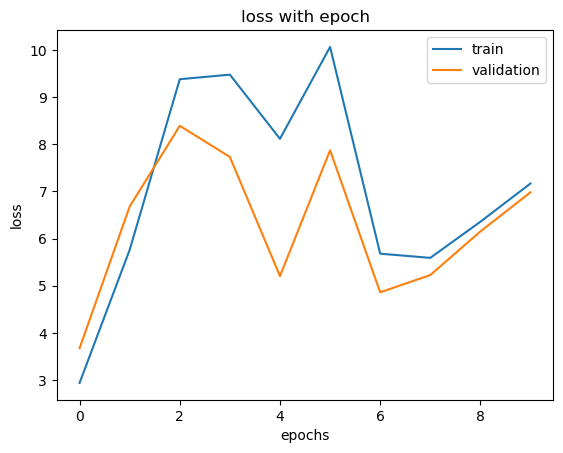

In [86]:
#plot loss
import matplotlib.pyplot as plt
#training loss
plt.plot(history.history['loss'])
#validation loss
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
# add legends
plt.legend(['train','validation'])
# title of plot
plt.title('loss with epoch')

plt.show()

In [50]:
#loading best model based on val_accuracy

from keras import models

finalmodel_sentiment = models.load_model('bestmodel_sentiment_trial1.h5')

#evaluate on test set



In [51]:
# prediction from model
ypred_sentiment=finalmodel_sentiment(x_test)

In [52]:
ypred_sentiment

<tf.Tensor: shape=(15590, 5), dtype=float32, numpy=
array([[8.29235539e-02, 7.26011217e-01, 9.26589146e-02, 8.06319565e-02,
        1.77743658e-02],
       [3.61682475e-02, 7.64998674e-01, 6.44676536e-02, 1.08304648e-02,
        1.23534925e-01],
       [4.02719527e-02, 1.01481073e-01, 4.18436587e-01, 8.68028495e-03,
        4.31130052e-01],
       ...,
       [1.45008698e-01, 2.04569012e-01, 3.37488204e-01, 3.06394100e-01,
        6.53998042e-03],
       [1.33801606e-02, 1.03071742e-02, 6.59892559e-01, 5.89872943e-04,
        3.15830171e-01],
       [2.16587484e-02, 2.93251216e-01, 4.98293042e-01, 1.69801991e-03,
        1.85098976e-01]], dtype=float32)>

In [53]:
# actual ypred
y_actual_sentiment=np.argmax(ypred_sentiment,axis=1)

In [54]:
#prediction of 
y_actual_sentiment

array([1, 1, 4, ..., 2, 2, 2], dtype=int64)

In [55]:
np.unique(y_actual_sentiment)

array([1, 2, 3, 4], dtype=int64)

In [56]:
type(y_actual_sentiment)

numpy.ndarray

In [57]:
#evaluate on test set
finalmodel_sentiment.evaluate(x_test, y_test_s)

488/488 [==============================] - 5s 8ms/step - loss: 1.0036 - accuracy: 0.6766


[1.0036267042160034, 0.6765875816345215]

# when_ANN

In [58]:
when_ANN = Sequential()

In [59]:
when_ANN.add(Flatten())
# adding layers and units to ANN model
when_ANN.add(Dense(units=512, activation='relu'))
#Add dropout regularization - a percentage of units should be set to 0. Eg: 0.25 - so 25% of units will
#be set to 0
when_ANN.add(Dropout(rate=0.35))
# hidden layer
when_ANN.add(Dense(units=256, activation='relu'))
when_ANN.add(Dropout(rate=0.35))
#output layer
when_ANN.add(Dense(units=4, activation='softmax'))

In [60]:
# compilation
when_ANN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
#Save the best model (W, b) by comparing accuracy/loss on validation set
filename = 'bestmodel_when_trial1.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')


In [62]:
#Training model with x_train
history =when_ANN.fit(x_train, y_train_w, epochs=5, validation_split=0.2, callbacks=[checkpoint, es, rd])


Epoch 1/5
1558/1559 [============================>.] - ETA: 0s - loss: 0.6878 - accuracy: 0.8005
Epoch 1: val_accuracy improved from -inf to 0.80893, saving model to bestmodel_when_trial1.h5
1559/1559 [==============================] - 81s 49ms/step - loss: 0.6878 - accuracy: 0.8005 - val_loss: 0.6546 - val_accuracy: 0.8089 - lr: 0.0010
Epoch 2/5
1559/1559 [==============================] - ETA: 0s - loss: 0.6256 - accuracy: 0.8208
Epoch 2: val_accuracy improved from 0.80893 to 0.81390, saving model to bestmodel_when_trial1.h5
1559/1559 [==============================] - 74s 47ms/step - loss: 0.6256 - accuracy: 0.8208 - val_loss: 0.6474 - val_accuracy: 0.8139 - lr: 0.0010
Epoch 3/5
1559/1559 [==============================] - ETA: 0s - loss: 0.5886 - accuracy: 0.8365
Epoch 3: val_accuracy did not improve from 0.81390
1559/1559 [==============================] - 75s 48ms/step - loss: 0.5886 - accuracy: 0.8365 - val_loss: 0.6500 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 4/5
1558/1559 [==

In [63]:
# sentiment_ANN Architecture
when_ANN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2000)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1024512   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 1,156,868
Trainable params: 1,156,868
No

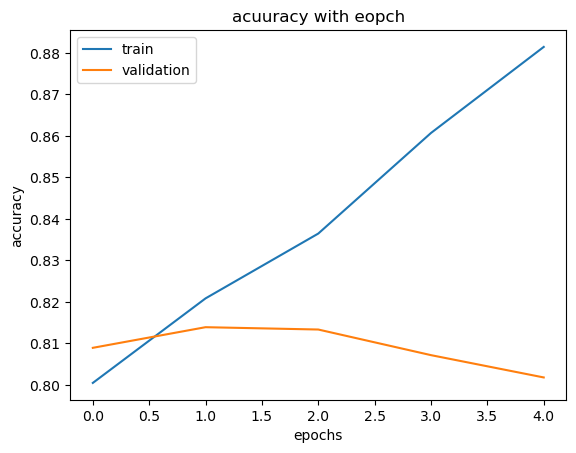

In [64]:
#plot accuracy with epochs 

#training accuracy
plt.plot(history.history['accuracy'])
#validation accuracy
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
# add legends
plt.legend(['train','validation'])
# title of plot
plt.title('acuuracy with eopch')
plt.show()



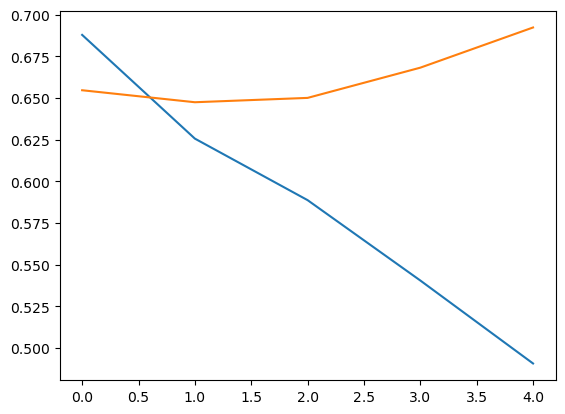

In [65]:
#plot loss
#training loss
plt.plot(history.history['loss'])
#validation loss
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
# add legends
plt.legend(['train','validation'])
# title of plot
plt.title('loss with epoch')

plt.show()

In [66]:
finalmodel_when = models.load_model('bestmodel_when_trial1.h5')


In [67]:
# prediction from model
ypred_when=finalmodel_when(x_test)

In [68]:
#loss:  - accuracy: 
finalmodel_when.evaluate(x_test, y_test_w)

488/488 [==============================] - 4s 7ms/step - loss: 0.6498 - accuracy: 0.8096


[0.6498381495475769, 0.8095574378967285]

# weather_ANN

In [69]:
weather_ANN = Sequential()

In [70]:
weather_ANN.add(Flatten())
# adding layers and units to ANN model

#Add dropout regularization - a percentage of units should be set to 0. Eg: 0.25 - so 25% of units will
#be set to 0

weather_ANN.add(Dense(units=1024, activation='relu'))
#weather_ANN.add(Dropout(rate=0.35))

# hidden layer
#weather_ANN.add(Dropout(rate=0.35))

#output layer
weather_ANN.add(Dense(units=15, activation='softmax'))

In [71]:
# compilation
weather_ANN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
#Save the best model (W, b) by comparing accuracy/loss on validation set
filename = 'bestmodel_weather_trial1.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')


In [73]:
#Training model with x_train
history =weather_ANN.fit(x_train, y_train_k, epochs=10, validation_split=0.2, callbacks=[checkpoint, es, rd])


Epoch 1/10
1559/1559 [==============================] - ETA: 0s - loss: 2.9377 - accuracy: 0.7282
Epoch 1: val_accuracy improved from -inf to 0.75016, saving model to bestmodel_weather_trial1.h5
1559/1559 [==============================] - 129s 81ms/step - loss: 2.9377 - accuracy: 0.7282 - val_loss: 3.6735 - val_accuracy: 0.7502 - lr: 0.0010
Epoch 2/10
1559/1559 [==============================] - ETA: 0s - loss: 5.7616 - accuracy: 0.7067
Epoch 2: val_accuracy improved from 0.75016 to 0.76780, saving model to bestmodel_weather_trial1.h5
1559/1559 [==============================] - 119s 76ms/step - loss: 5.7616 - accuracy: 0.7067 - val_loss: 6.6798 - val_accuracy: 0.7678 - lr: 0.0010
Epoch 3/10
1559/1559 [==============================] - ETA: 0s - loss: 9.3815 - accuracy: 0.6701
Epoch 3: val_accuracy did not improve from 0.76780
1559/1559 [==============================] - 114s 73ms/step - loss: 9.3815 - accuracy: 0.6701 - val_loss: 8.3926 - val_accuracy: 0.6219 - lr: 0.0010
Epoch 4/10


In [74]:
# sentiment_ANN Architecture
weather_ANN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2000)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              2049024   
                                                                 
 dense_7 (Dense)             (None, 15)                15375     
                                                                 
Total params: 2,064,399
Trainable params: 2,064,399
Non-trainable params: 0
_________________________________________________________________


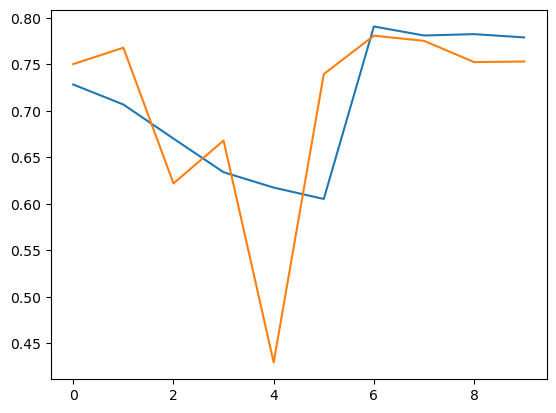

In [75]:
#plot accuracy with epochs 

#training accuracy
plt.plot(history.history['accuracy'])
#validation accuracy
plt.plot(history.history['val_accuracy'])
plt.show()


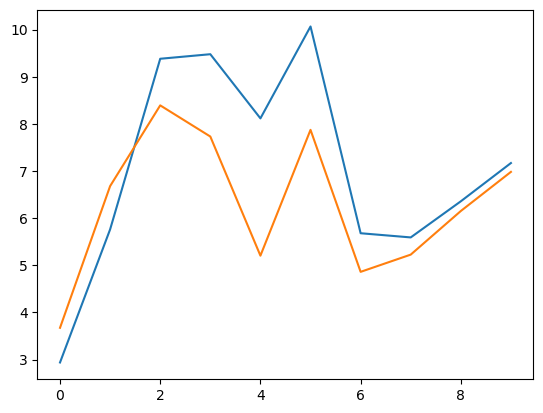

In [76]:
#training loss
plt.plot(history.history['loss'])
#validation loss
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
# add legends
plt.legend(['train','validation'])
# title of plot
plt.title('loss with epoch')

plt.show()

In [77]:
finalmodel_weather = models.load_model('bestmodel_weather_trial1.h5')


In [78]:
# prediction from model
ypred_weather=finalmodel_weather(x_test)

In [79]:
#loss:  - accuracy: 
finalmodel_weather.evaluate(x_test, y_test_k)

488/488 [==============================] - 7s 12ms/step - loss: 5.4783 - accuracy: 0.7849


[5.478297233581543, 0.7848621010780334]

# Conclusion:

In this project,we did Exploratory Data Analysis on Dataset,split the data into train and test,did Tokeniztion and Vectorization of predictor then we created three different neural network models to predict the sentiment, when, and kind labels for tweets related to weather conditions. Each model was trained on a dataset that included the text of the tweets, their location, and a confidence score for each label.

The sentiment model achieved an accuracy of 0.676587 on the test set, indicating that the model was able to correctly predict the sentiment label for approximately two-thirds of the tweets.

The when model achieved an accuracy of 0.80955 on the test set, indicating that the model was able to correctly predict the when label for approximately four-fifths of the tweets.

The kind/weather model achieved an accuracy of 0.7848 on the test set, indicating that the model was able to correctly predict the kind label for approximately three-fourths of the tweets.

Overall, the results suggest that the models are performing reasonably well on the given task, although dataset is imbalanced there is still room for improvement. Possible next steps could involve adding data for labels which are less populated and further tuning the model hyperparameters, or trying out alternative model architectures.